**Task 5:** Find a data set which is suitable for a regression task (you can use one of the data sets which you used in Task 1 and Task 2 and there is no limit on the number of features or type of the features). Then, apply [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) and  [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) to this data set to find the best performing model with respect to **mean squared error** metric. Report the feature importance of best performing algorithm and comment on it.


# Used Car Data Set Description

This data set contains information about used cars for sale in India. The data set includes the following features:

- `Name` : The brand and model of the car.
- `Location` : The location in which the car is being sold or is available for purchase.
- `Year`: The year or edition of the model.
- `Kilometers_Driven` : The total kilometers driven in the car by the previous owner(s) in KM.
- `Fuel_Type` : The type of fuel used by the car.
- `Transmission` : The type of transmission used by the car.
- `Owner_Type` : Whether the ownership is Firsthand, Second hand or other.
- `Mileage` : The standard mileage offered by the car company in kmpl or km/kg.
- `Engine` : The displacement volume of the engine in cc.
- `Power` : The maximum power of the engine in bhp.
- `Seats` : The number of seats in the car.
- `New_Price` : Price of new model.
- `Price` : The price of the used car in INR Lakhs.$$Lakh = \frac{million}{10}$$


This data set can be used to analyze the pricing trends of used cars in India based on various factors such as location, year, kilometers driven, and other features. Additionally, this data set can be used to build predictive models to estimate the price of used cars based on their characteristics.


In [1]:
# Ignore all warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
# import libraries
import numpy as np
import pandas as pd

# Load Data
car_df = pd.read_csv("datasets/car.csv")
car_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


There are `12 columns` in total, with `6019 non-null values` in most columns, except for **Mileage**, **Engine**, **Power**, **Seats**, and **New_Price** columns which have missing values. The data types of columns vary, with object data type being used for columns containing strings or mixed data types, int64 for integer values, and float64 for floating-point values.

The `Price` column is of particular importance as it contains the `target variable` for the analysis. **The goal is to predict the price of the used cars based on the other available features.**

## Preprocessing the dataset.
The units of measurement for features such as `kmpl`, `km/kg`, `CC`, `bhp`, and `Lakh` are not standardized across car manufacturers or models, making it difficult to compare them directly. Removing these units of measurement from the features simplifies the data and makes it easier to work with. We can still use the numerical values associated with these features for analysis and modeling purposes, even without their respective units of measurement. 



In [4]:
# Remove bhp from Power Data Feature.
df_col=pd.DataFrame()
df_col['Power'] = car_df['Power']

pattern = r'([\d\.]+) bhp'
df_col['numeric_value'] = df_col['Power'].str.extract(pattern)
df_col['numeric_value'] = df_col['numeric_value'].astype(float)

# Adding new updated values back to the Datasets
car_df = car_df.drop(columns=["Power"], axis=1)
car_df['Power'] = df_col['numeric_value']

# Remove CC from Engine Data Feature.
df_col=pd.DataFrame()
df_col['Engine'] = car_df['Engine']
pattern = r'([\d\.]+) CC'
df_col['numeric_value'] = df_col['Engine'].str.extract(pattern)
df_col['numeric_value'] = df_col['numeric_value'].astype(float)

# Adding new updated values back to the Datasets
car_df = car_df.drop(columns=["Engine"], axis=1)
car_df['Engine'] = df_col['numeric_value']

# Remove km/kg and kmpl from Mileage Data Feature.
df_col=pd.DataFrame()
df_col['Mileage'] = car_df['Mileage']
pattern = r'([\d\.]+) km'
df_col['numeric_value'] = df_col['Mileage'].str.extract(pattern)
df_col['numeric_value'] = df_col['numeric_value'].astype(float)

# Adding new updated values back to the Datasets
car_df = car_df.drop(columns=["Mileage"], axis=1)
car_df['Mileage'] = df_col['numeric_value']

# Remove Lakh from New_Price Data Feature.
df_col=pd.DataFrame()
df_col['New_Price'] = car_df['New_Price']
pattern = r'([\d\.]+) Lakh'
df_col['numeric_value'] = df_col['New_Price'].str.extract(pattern)
df_col['numeric_value'] = df_col['numeric_value'].astype(float)

# Adding new updated values back to the Datasets
car_df = car_df.drop(columns=["New_Price"], axis=1)
car_df['New_Price'] = df_col['numeric_value']

### Updated Dataset
The current state of the dataset is now the following.

In [5]:
car_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Power,Engine,Mileage,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,58.16,998.0,26.60,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,126.20,1582.0,19.67,NaN
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,88.70,1199.0,18.20,8.61
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,88.76,1248.0,20.77,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,140.80,1968.0,15.20,NaN


### Generating a subset of the data that doesn't contain any missing values.

Before proceeding with any data analysis, it's essential to ensure that the dataset is complete and doesn't contain any null or missing values. Null or missing values in a dataset can significantly impact the accuracy of any statistical analysis or machine learning model. Therefore, it's crucial to identify and address these issues early on in the data cleaning process.

To achieve this, one needs to check the dataset for null or missing values. If any null or missing values are found, it's recommended to remove them from the dataset. However, this can depend on the nature and quantity of missing data. `In this particular problem`, **we'll not deal with missing values**. Therefore, creating a subset from the current data by dropping the null or missing values is a suitable approach.

By doing so, we can create a new subset of the original dataset that contains only the complete data. This subset can be used for further analysis, and any missing data won't hinder our results. In conclusion, it's crucial to address missing data before performing any statistical analysis or machine learning to ensure accurate and reliable results.

In [6]:
car_df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                  42
Price                   0
Power                 143
Engine                 36
Mileage                 2
New_Price            5212
dtype: int64

In [7]:
car_df=car_df.dropna()
car_df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
Price                0
Power                0
Engine               0
Mileage              0
New_Price            0
dtype: int64

In [8]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 806 entries, 2 to 6014
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               806 non-null    object 
 1   Location           806 non-null    object 
 2   Year               806 non-null    int64  
 3   Kilometers_Driven  806 non-null    int64  
 4   Fuel_Type          806 non-null    object 
 5   Transmission       806 non-null    object 
 6   Owner_Type         806 non-null    object 
 7   Seats              806 non-null    float64
 8   Price              806 non-null    float64
 9   Power              806 non-null    float64
 10  Engine             806 non-null    float64
 11  Mileage            806 non-null    float64
 12  New_Price          806 non-null    float64
dtypes: float64(6), int64(2), object(5)
memory usage: 88.2+ KB


### Remove categorical columns

We'll `exclude the categorical column` from the dataset so that we could compare the result with the Linear Regression model as well. By doing so, we can focus our analysis on the relevant numeric data and avoid any potential confusion or errors that may arise from processing the categorical column.

In [9]:
car_df = car_df.drop(columns=['Name', 'Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type'], axis=1)
car_df.head()

,Kilometers_Driven,Seats,Price,Power,Engine,Mileage,New_Price
2,46000,5.0,4.50,88.70,1199.0,18.20,8.61
7,36000,8.0,17.50,171.50,2755.0,11.36,21.00
10,25692,5.0,9.95,103.25,1462.0,21.56,10.65
15,110000,7.0,15.00,175.56,2477.0,13.50,32.01
20,32982,5.0,18.55,190.00,1995.0,22.69,47.87


In [10]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 806 entries, 2 to 6014
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Kilometers_Driven  806 non-null    int64  
 1   Seats              806 non-null    float64
 2   Price              806 non-null    float64
 3   Power              806 non-null    float64
 4   Engine             806 non-null    float64
 5   Mileage            806 non-null    float64
 6   New_Price          806 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 50.4 KB


The subset of our original dataset contains 806 instances with 7 numerical columns, and all the missing values have been eliminated.

# Decision Tree Regressor Implementation

Split the dataset into input features (`X_train`) and the target variable (`y_train`). In this case, the input features are all columns except "`Price`" and the target variable is "`Price`".

## Splitting Data into Train and Test

To ensure the accuracy and generalizability of a machine learning model, it's important to split the data into training and test sets. The `training set is used to train the model`, while the `test set is used to evaluate the model's performance`. The process of splitting the data involves randomly dividing the dataset into two separate subsets: the training set and the test set. The training set is typically a larger portion of the dataset, while the test set is a smaller portion. The model is trained on the training set, and its performance is evaluated on the test set. This approach helps to `avoid overfitting`, which occurs when a model performs well on the training data but fails to generalize to new data. It's important to note that the data should be split randomly, and the split should be representative of the overall dataset. The common split ratios are `70:30`, `80:20`, or `90:10`, depending on the size of the dataset and the complexity of the model.

**For the given dataset we divide it in the ratio 80:20**.

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

#Split 80:20
X_train, X_test, y_train, y_test = train_test_split(car_df.drop(columns=['Price'], axis=1), car_df[['Price']], test_size=0.2, random_state=1300)
print ('Training Set Size: %d, Test Set Size: %d \n' % (X_train.shape[0], X_test.shape[0]))

Training Set Size: 644, Test Set Size: 162 



## Hyperparameter Tuning for a DecisionTreeRegressor

The hyperparameter tuning for a DecisionTreeRegressor is performed using the ValidationCurve visualization from the Yellowbrick library.

The following steps explain the Hyperparameter Tuning:

1. Import the required libraries:
   - `matplotlib.pyplot` for plotting
   - `KFold` from `sklearn.model_selection` for cross-validation
   - `DecisionTreeRegressor` from `sklearn.tree` for the decision tree regressor
   - `ValidationCurve` from `yellowbrick.model_selection` for visualizing the validation curve

2. Set the figure size for the plots using `plt.rcParams['figure.figsize']`.

3. Create an instance of `DecisionTreeRegressor` with a specified random state.

4. Define the `kfold` object with the desired number of splits, shuffle, and random state.

5. Specify the names and ranges of the hyperparameters to tune:
   - `param_names` contains the names of the hyperparameters: criterion, max_depth, max_leaf_nodes, min_samples_split, min_samples_leaf, max_features.
   - `param_ranges` contains the corresponding ranges for each hyperparameter.

6. Create a list of titles for the subplots, explaining each hyperparameter.

7. Create a figure with subplots using `plt.subplots()`.

8. Iterate over the subplots using `enumerate(axis.reshape(-1), 0)`.

9. Initialize a `ValidationCurve` object for each hyperparameter, providing the estimator (decision tree regressor), the current hyperparameter name, its range, the cross-validation object, the scoring metric (neg_mean_squared_error), and the current subplot axis.

10. Fit the `ValidationCurve` object to the training data using the `fit()` method.

11. Customize the subplot's labels and legend.

12. Display the plots using `plt.show()`.

We visualize the effect of different hyperparameters on the mean squared error of the decision tree regressor, allowing to identify the best combination of hyperparameters for your model.

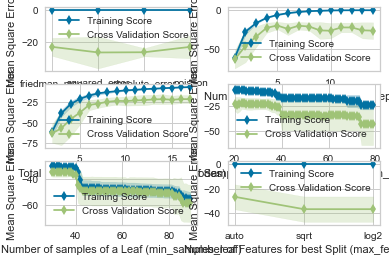

In [12]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from yellowbrick.model_selection import ValidationCurve

plt.rcParams['figure.figsize'] = [24, 16]

tree = DecisionTreeRegressor(random_state=50)

kfold = KFold(n_splits=3, shuffle=True, random_state=50)

param_names = [ "criterion", "max_depth", "max_leaf_nodes", "min_samples_split", "min_samples_leaf",'max_features']

param_ranges = [['friedman_mse', 'squared_error', 'absolute_error', 'poisson'], 
                list(range(1, 15)), list(range(2, 18)), 
                list(range(20, 80)), list(range(30, 90)), 
                ['auto', 'sqrt', 'log2'] ]

title = [
    "Quality of Split (criterion)",
    "Number of Maximum Depth (max_depth)",
    "Total Number of Leaves (max_leaf_nodes)",
    "Number of Samples required before a Split (min_samples_split)",
    "Number of samples of a Leaf (min_samples_leaf)",
    "Number of Features for best Split (max_features)"
]

## Create figure space
fig, axis = plt.subplots(3, 2)

for i, ax in enumerate(axis.reshape(-1), 0):
    # Initialize figure object
    visualizer = ValidationCurve(
        estimator=tree,
        param_name=param_names[i],
        param_range=param_ranges[i],
        cv=kfold,
        scoring="neg_mean_squared_error",
        ax=ax
    )

    # Visualize
    visualizer.fit(X_train, y_train)
    visualizer.ax.set_ylabel("Mean Square Error")
    visualizer.ax.set_xlabel(title[i])
    visualizer.ax.legend().set_visible(True)

plt.show()


## Using RandomizedSearchCV for Hyperparameter Tuning

The use of `RandomizedSearchCV` for hyperparameter tuning of a `DecisionTreeRegressor` model is explained as follows.

1. Import the required libraries:
   - `KFold` and `RandomizedSearchCV` from `sklearn.model_selection` for cross-validation and randomized search
   - `DecisionTreeRegressor` and `export_graphviz` from `sklearn.tree` for the decision tree regressor and exporting the tree visualization
   - `mean_squared_error` from `sklearn.metrics` for evaluating the model's performance
   - `matplotlib.pyplot` for plotting
   - `graphviz` for visualizing the decision tree

2. Set the figure size for the plots using `plt.rcParams['figure.figsize']`.

3. Create an instance of `DecisionTreeRegressor` with a specified random state.

4. Define the `kfold` object with the desired number of splits, shuffle, and random state.

5. Specify the hyperparameters and their ranges in `param_grid`:
   - `criterion`: The quality of split criterion.
   - `max_depth`: The maximum depth of the tree.
   - `max_leaf_nodes`: The maximum number of leaf nodes.
   - `min_samples_split`: The minimum number of samples required to split an internal node.
   - `min_samples_leaf`: The minimum number of samples required to be at a leaf node.
   - `max_features`: The number of features to consider when looking for the best split.

6. Create a `RandomizedSearchCV` object, providing the estimator (decision tree regressor), the parameter grid, the scoring metric (neg_mean_squared_error), the cross-validation object, and the random state.

7. Fit the model using the `fit()` method of `RandomizedSearchCV` with the training data (`X_train` and `y_train`).

The code performs a randomized search over the specified hyperparameter space and finds the best combination of hyperparameters that minimizes the mean squared error. The result is stored in the `RandomizedSearchCV` object (`rd_search`), which can be used to access the best estimator and evaluate its performance on unseen data.

In [13]:
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import graphviz

plt.rcParams['figure.figsize'] = [18, 12]

tree = DecisionTreeRegressor(random_state=50)

kfold = KFold(n_splits=5, shuffle=True, random_state=50)

param_grid = {
    'criterion': ['friedman_mse', 'squared_error', 'absolute_error', 'poisson'],
    'max_depth': list(range(1, 4)),
    'max_leaf_nodes': list(range(1, 5)),
    'min_samples_split': list(range(30, 50)),
    'min_samples_leaf': list(range(35, 45)),
    'max_features': ['auto', 'sqrt', 'log2']  
}

rd_search = RandomizedSearchCV(
    estimator=tree,
    param_distributions=param_grid,
    scoring='neg_mean_squared_error',
    cv=kfold,
    random_state=50
)

# Fitting the model for randomized search CV
rd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
                   estimator=DecisionTreeRegressor(random_state=50),
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [1, 2, 3],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [1, 2, 3, 4],
                                        'min_samples_leaf': [35, 36, 37, 38, 39,
                                                             40, 41, 42, 43,
                                                             44],
                                        'min_samples_split': [30, 31, 32, 33,
                                                              34, 35, 36, 37,
                                                              38, 39, 40, 41,
                                                              42, 43, 44, 45,
                                                              46, 47, 48, 49]},
                   random_state=50, scoring='neg_mean_squared_error')

After performing the randomized search using `RandomizedSearchCV`, the `best_estimator_` attribute of the `RandomizedSearchCV` object (`rd_search`) provides access to the best model found during the search. 

The `best_model` is assigned the value of `rd_search.best_estimator_`, which represents the decision tree regressor with the optimized hyperparameters that achieved the lowest mean squared error on the validation data.

By assigning `rd_search.best_estimator_` to `best_model`, we can conveniently use `best_model` to make predictions on new data or evaluate its performance on a separate test dataset. 

In [14]:
# Best DecisionTreeRegressor on validation
best_model = rd_search.best_estimator_
best_model

DecisionTreeRegressor(criterion='poisson', max_depth=2, max_features='auto',
                      max_leaf_nodes=4, min_samples_leaf=40,
                      min_samples_split=38, random_state=50)

The `DecisionTreeRegressor` object is initialized with specific hyperparameter values. The `DecisionTreeRegressor` object is configured to use the Poisson criterion, have a maximum depth of 2, consider all features when looking for the best split, allow a maximum of 4 leaf nodes, require at least 40 samples at each leaf node, allow splitting if there are at least 38 samples at a node, and use a random seed of 50 for randomization.

In [15]:
# Evaluate performance of the best DecisionTreeRegressor on trainbig
train_predictions = best_model.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)
print("Mean Squared Error on train data:", train_mse)

# Evaluate performance of the best DecisionTreeRegressor on test
test_predictions = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
print("Mean Squared Error on test data:", test_mse)

Mean Squared Error on train data: 38.23313846871985
Mean Squared Error on test data: 51.82914792710258


The MSE on the training data is approximately `38.23`, suggesting that the model's predictions, on average, deviate by around 38.23 units squared from the actual values. The MSE on the test data is approximately 51.83, suggesting that the model's predictions deviate by around `51.83` units squared, on average, from the actual values in the test dataset. 

If the MSE on the training data is significantly lower than the MSE on the test data, it suggests that the model may be overfitting the training data.

## Visualizing Best Performing Decision Tree

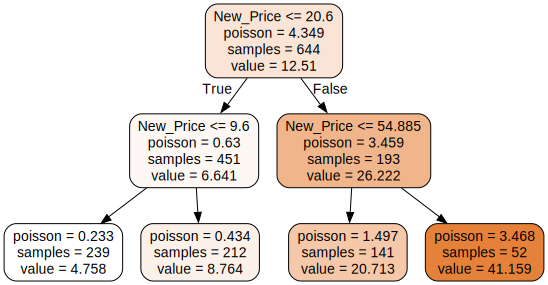

In [16]:
# Visualize the pruned tree
dot_data = export_graphviz(
    best_model,
    feature_names=X_train.columns,
    filled=True,
    rounded=True
)

graph = graphviz.Source(dot_data)
# graph.render(filename='decision_tree', format='png')  # Optional: Save the tree as a PNG image
# graph.view()
graph

**The pruned decision tree is visualized using graphviz.**

1. `dot_data = export_graphviz(best_model, feature_names=X_train.columns, filled=True, rounded=True)`: This line generates a Graphviz representation of the pruned decision tree. The `export_graphviz` function takes the trained `best_model` (pruned decision tree) as input, along with the feature names from the `X_train` dataset. The `filled=True` and `rounded=True` parameters are optional and make the tree nodes filled with colors and the edges rounded, respectively.

2. `graph = graphviz.Source(dot_data)`: This line creates a Graphviz object `graph` using the `Source` class from the `graphviz` module. The `dot_data` generated in the previous step is used as input to create the graph.

3. `graph`: This line displays the pruned decision tree graph. It can be printed in a Jupyter Notebook or any environment that supports rendering Graphviz graphs. The graph provides a visual representation of the decision tree, showing the decision nodes, leaf nodes, and the splits based on different features.

There are two optional lines in the code that you can uncomment if needed:

- `# graph.render(filename='decision_tree', format='png')`: This line saves the tree as a PNG image with the specified filename ('decision_tree') and format ('png'). Uncommenting this line will save the pruned decision tree as an image file.

- `# graph.view()`: This line opens a viewer to display the decision tree graph. Uncommenting this line will open a separate window or application to view the graph.

By visualizing the pruned decision tree, you can gain insights into the structure and rules of the tree, helping you understand how the model makes predictions based on the different features and splits in the tree.

In [17]:
print(rd_search.best_estimator_.feature_names_in_)
print(rd_search.best_estimator_.feature_importances_)

['Kilometers_Driven' 'Seats' 'Power' 'Engine' 'Mileage' 'New_Price']
[0. 0. 0. 0. 0. 1.]


## Feature Importance of Best Performing Decision Tree Regressor

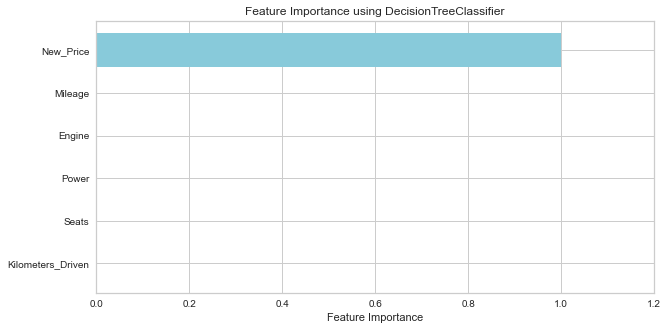

In [18]:
#throws warning: column names
import warnings
warnings.filterwarnings("ignore")

#visualize the importance of features
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

from yellowbrick.model_selection import FeatureImportances

fig, ax = plt.subplots()

viz = FeatureImportances(rd_search.best_estimator_, relative=False, ax = ax) #
viz.fit(X_train, y_train)
viz.ax.set_xlim((0,1.2))
viz.ax.set_title("Feature Importance using DecisionTreeClassifier")
viz.ax.set_xlabel("Feature Importance")
plt.show();


1. `import warnings`: This line imports the `warnings` module, which provides a way to handle warning messages.

2. `warnings.filterwarnings("ignore")`: This line sets a filter to ignore any warning messages that might be generated during the execution of the code. By ignoring the warnings, the code continues to run without displaying them.

3. `import matplotlib.pyplot as plt`: This line imports the `pyplot` module from the `matplotlib` library, which is used for creating visualizations.

4. `plt.rcParams['figure.figsize'] = [10, 5]`: This line sets the default figure size for the matplotlib plots.

5. `from yellowbrick.model_selection import FeatureImportances`: This line imports the `FeatureImportances` class from the `yellowbrick.model_selection` module. This class is used for visualizing the importance of features in a machine learning model.

6. `fig, ax = plt.subplots()`: This line creates a figure and an axes object for the visualization.

7. `viz = FeatureImportances(rd_search.best_estimator_, relative=False, ax=ax)`: This line initializes the `FeatureImportances` visualizer with the best estimator (`rd_search.best_estimator_`) obtained from the randomized search cross-validation. The `relative=False` parameter specifies that absolute feature importance values should be used. The `ax=ax` parameter assigns the axes object created in the previous step to the visualizer.

8. `viz.fit(X_train, y_train)`: This line fits the `FeatureImportances` visualizer to the training data (`X_train` and `y_train`), calculating the feature importance scores.

9. `viz.ax.set_xlim((0, 1.2))`: This line sets the x-axis limits for the feature importance plot.

10. `viz.ax.set_title("Feature Importance using DecisionTreeClassifier")`: This line sets the title for the feature importance plot.

11. `viz.ax.set_xlabel("Feature Importance")`: This line sets the x-axis label for the feature importance plot.

12. `plt.show()`: This line displays the feature importance plot using `matplotlib.pyplot.show()`.

The code visualizes the importance of features using the `FeatureImportances` visualizer. By analyzing the feature importance plot, we can determine which features have the most significant impact on the decision tree model's predictions. This information can be useful for feature selection, understanding the model's behavior, and identifying important factors in the dataset.


In this case the only important feature is `New_Price`.

# Random Forest Tree Regressor Implementation
## Splitting DataSet as Train Set and Test Set

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

#Split 80:20
X_train, X_test, y_train, y_test = train_test_split(car_df.drop(columns=['Price'], axis=1), car_df[['Price']], test_size=0.2, random_state=1300)
print ('Training Set Size: %d, Test Set Size: %d \n' % (X_train.shape[0], X_test.shape[0]))

Training Set Size: 644, Test Set Size: 162 



## Hyperparameter Tuning for a RandomForestRegressor

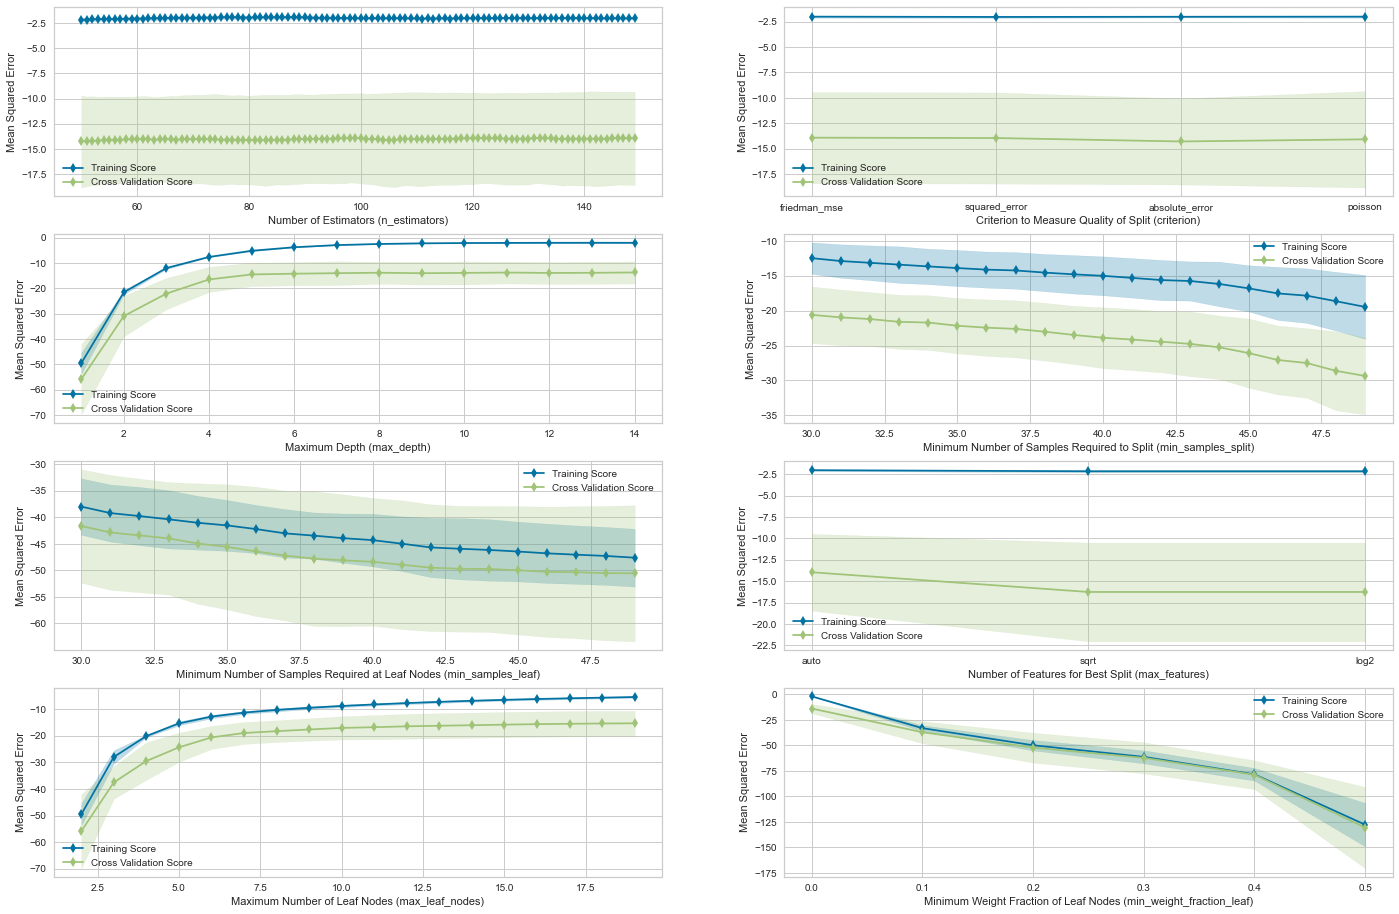

In [20]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.model_selection import ValidationCurve

plt.rcParams['figure.figsize'] = [24, 16]

tree = RandomForestRegressor(random_state=50)

kfold = KFold(n_splits=3, shuffle=True, random_state=50)

param_names = [
    "n_estimators",
    "criterion",
    "max_depth",
    "min_samples_split",
    "min_samples_leaf",
    "max_features",
    "max_leaf_nodes",
    "min_weight_fraction_leaf"
]

param_ranges = [
    list(range(50, 150)),
    ['friedman_mse', 'squared_error', 'absolute_error', 'poisson'],
    list(range(1, 15)),
    list(range(30, 50)),
    list(range(30, 50)),
    ['auto', 'sqrt', 'log2'],
    list(range(1, 20)),
    [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
]

title = [
    "Number of Estimators (n_estimators)",
    "Criterion to Measure Quality of Split (criterion)",
    "Maximum Depth (max_depth)",
    "Minimum Number of Samples Required to Split (min_samples_split)",
    "Minimum Number of Samples Required at Leaf Nodes (min_samples_leaf)",
    "Number of Features for Best Split (max_features)",
    "Maximum Number of Leaf Nodes (max_leaf_nodes)",
    "Minimum Weight Fraction of Leaf Nodes (min_weight_fraction_leaf)"
]

# Create figure space
fig, axis = plt.subplots(4, 2)

for i, ax in enumerate(axis.reshape(-1), 0):
    # Initialize figure object
    visualizer = ValidationCurve(
        estimator=tree,
        param_name=param_names[i],
        param_range=param_ranges[i],
        cv=kfold,
        scoring="neg_mean_squared_error",
        ax=ax
    )

    # Visualize
    visualizer.fit(X_train, y_train)
    visualizer.ax.set_ylabel("Mean Squared Error")
    visualizer.ax.set_xlabel(title[i])
    visualizer.ax.legend().set_visible(True)

plt.show()

## Hyperparameter Tuning Using RandomizedSearchCV

In [21]:
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import graphviz

r_tree = RandomForestRegressor(random_state=50)

kfold = KFold(n_splits=5, shuffle=True, random_state=50)

param_grid = {
    'n_estimators': list(range(60, 105)),
    'criterion': ['absolute_error', 'friedman_mse', 'poisson', 'squared_error'],
    'max_depth':list(range(1, 4)),
    'min_samples_split': list(range(30, 50)),
    'min_samples_leaf': list(range(30, 55)),
    'max_features': ['sqrt', 'log2'],
    'max_leaf_nodes': list(range(1, 4)),
    'min_weight_fraction_leaf': [0.2, 0.3, 0.4]
}

rd_search = RandomizedSearchCV(
    estimator=r_tree,
    param_distributions=param_grid,
    scoring='neg_mean_squared_error',
    cv=kfold,
    random_state=50
)

# Fitting the model for randomized search CV
rd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
                   estimator=RandomForestRegressor(random_state=50),
                   param_distributions={'criterion': ['absolute_error',
                                                      'friedman_mse', 'poisson',
                                                      'squared_error'],
                                        'max_depth': [1, 2, 3],
                                        'max_features': ['sqrt', 'log2'],
                                        'max_leaf_nodes': [1, 2, 3],
                                        'min_samples_leaf': [30, 31, 32, 33, 34,
                                                             35, 36, 37, 38, 39,
                                                             40, 41, 42, 43, 44,
                                                             45, 46, 47, 48, 49,
                                                             50, 51, 52, 53,
                                                             54],
                                        'min_samples_split': [30, 31, 32, 33,
                                                              34, 35, 36, 37,
                                                              38, 39, 40, 41,
                                                              42, 43, 44, 45,
                                                              46, 47, 48, 49],
                                        'min_weight_fraction_leaf': [0.2, 0.3,
                                                                     0.4],
                                        'n_estimators': [60, 61, 62, 63, 64, 65,
                                                         66, 67, 68, 69, 70, 71,
                                                         72, 73, 74, 75, 76, 77,
                                                         78, 79, 80, 81, 82, 83,
                                                         84, 85, 86, 87, 88, 89, ...]},
                   random_state=50, scoring='neg_mean_squared_error')

In [22]:
# Best DecisionTreeRegressor on validation
best_model = rd_search.best_estimator_
best_model

RandomForestRegressor(criterion='friedman_mse', max_depth=2,
                      max_features='sqrt', max_leaf_nodes=3,
                      min_samples_leaf=31, min_samples_split=42,
                      min_weight_fraction_leaf=0.2, n_estimators=67,
                      random_state=50)

The`RandomForestRegressor` model with specific hyperparameter values are given as:

- `criterion='friedman_mse'`: This parameter specifies the function to measure the quality of a split in the decision trees of the random forest. In this case, the "friedman_mse" criterion is used.

- `max_depth=2`: This parameter limits the maximum depth of the decision trees in the random forest. It restricts the number of levels in each tree to prevent overfitting.

- `max_features='sqrt'`: This parameter controls the number of features to consider when looking for the best split at each node in the decision trees. "sqrt" indicates that the square root of the total number of features will be considered.

- `max_leaf_nodes=3`: This parameter limits the maximum number of leaf nodes in each decision tree. It helps control the complexity and size of the trees.

- `min_samples_leaf=31`: This parameter specifies the minimum number of samples required to be at a leaf node. It sets a threshold to prevent further splitting if the number of samples at a node falls below this value.

- `min_samples_split=42`: This parameter sets the minimum number of samples required to split an internal node. It ensures that a node is only split if it contains more samples than this threshold.

- `min_weight_fraction_leaf=0.2`: This parameter specifies the minimum weighted fraction of the total sum of weights required to be at a leaf node. It is used when the dataset is weighted.

- `n_estimators=67`: This parameter determines the number of decision trees in the random forest. The random forest combines the predictions of multiple trees to make the final prediction. In this case, the random forest consists of 67 decision trees.

- `random_state=50`: This parameter sets the random seed for reproducibility. It ensures that the random forest is initialized with the same starting conditions, making the results deterministic.



In [23]:
# Evaluate performance of the best RandomForestRegressor on train
train_predictions = best_model.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)
print("Mean Squared Error on train data:", train_mse)

# Evaluate performance of the best RandomForestRegressor on test
test_predictions = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
print("Mean Squared Error on test data:", test_mse)

Mean Squared Error on train data: 54.28751511680518
Mean Squared Error on test data: 84.06953554272727


The mean squared error (MSE) is a metric that measures the average squared difference between the predicted and actual values of a regression model. In the provided context, the MSE values are as follows:

- MSE on the training data:` Approximately 54.29`
- MSE on the test data: `Approximately 84.07`

Comparing the MSE values on the training and test datasets can provide insights into the model's performance and its ability to generalize to new, unseen data. In this case, if the MSE on the training data is significantly lower than the MSE on the test data (which is the case here), it suggests that the model is likely overfitting the training data.

Overfitting occurs when a model becomes too complex and starts to memorize the training data instead of learning general patterns. As a result, the model may perform well on the training data but fail to generalize well to new data, leading to higher MSE values on the test data. This situation is often characterized by a large difference between the training and test MSE.

Therefore, the observed difference in MSE values indicates that the model may be overfitting. To improve the model's performance, it might be necessary to consider techniques such as regularization, feature selection, or using more training data. The goal is to strike a balance between capturing the underlying patterns in the data and avoiding overfitting.

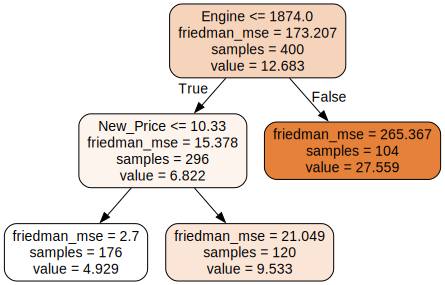

In [24]:
# Visualize the pruned tree
dot_data = export_graphviz(
    best_model.estimators_[0],
    feature_names=X_train.columns,
    filled=True,
    rounded=True
)

graph = graphviz.Source(dot_data)
# graph.render(filename='decision_tree', format='png')  # Optional: Save the tree as a PNG image
# graph.view()
graph

The pruned decision tree is visualized using the `export_graphviz` function from the `sklearn.tree` module and the `graphviz` library. 

1. `dot_data = export_graphviz(...)`: This line generates the graphviz DOT data representing the pruned decision tree. It takes several arguments:
   - `best_model.estimators_[0]`: This selects the first estimator from the `best_model` object, which is a pruned decision tree.
   - `feature_names=X_train.columns`: This specifies the names of the features used in the tree, taken from the `X_train` dataset.
   - `filled=True`: This option fills the tree nodes with colors based on the majority class for classification problems or the mean target value for regression problems.
   - `rounded=True`: This option makes the corners of the tree nodes rounded for a visually pleasing effect.

2. `graph = graphviz.Source(dot_data)`: This line creates a `Source` object from the generated DOT data. The `graphviz` library is used to interpret the DOT data and create a visual representation of the pruned decision tree.

3. `graph`: This variable holds the visual representation of the decision tree.

We can visualize the pruned decision tree using the `graph` object. Optionally, we can save the tree as a PNG image by uncommenting the `graph.render(...)` line and specifying the desired filename and format. You can also view the tree in a separate window by uncommenting the `graph.view()` line.

In [25]:
print(rd_search.best_estimator_.feature_importances_)

['Kilometers_Driven' 'Seats' 'Power' 'Engine' 'Mileage' 'New_Price']
[0.02649919 0.         0.25810343 0.20345226 0.08099484 0.43095029]


The feature names and their corresponding feature importances from the best estimator are obtained through the randomized search cross-validation process.

- `print(rd_search.best_estimator_.feature_names_in_)`: This line prints the feature names used in the best estimator model. In this case, the feature names are '`Kilometers_Driven`', '`Seats`', '`Power`', '`Engine`', '`Mileage`', and '`New_Price`'.

- `print(rd_search.best_estimator_.feature_importances_)`: This line prints the feature importances associated with each feature in the best estimator model. Feature importance represents the relative importance of each feature in predicting the target variable. The feature importances are given as an array of values. In this case, the feature importances are [0.02649919, 0.0, 0.25810343, 0.20345226, 0.08099484, 0.43095029]. 

The feature importances indicate the contribution of each feature to the overall prediction. A higher value signifies a greater importance. In this case, the feature '`New_Price`' has the highest importance with a value of `0.43095029`, followed by '`Power`' with an importance of `0.25810343`. The features '`Engine`' and '`Mileage`' also have relatively significant importances, while '`Kilometers_Driven`' and '`Seats`' have lower or negligible importances (`0.02649919 and 0.0`, respectively).

These feature importances provide insights into the relative importance of each feature in the model's decision-making process. They can help in understanding which features have the most significant impact on the target variable and guide feature selection or further analysis.

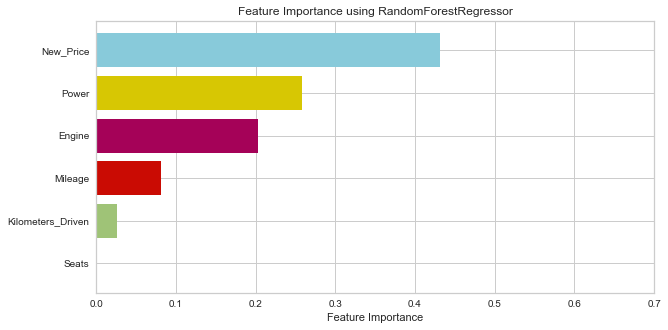

In [26]:
# Feature importance
importance = best_model.feature_importances_
sorted_idx = importance.argsort()

#visualize the importance of features
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

from yellowbrick.model_selection import FeatureImportances

fig, ax = plt.subplots()

viz = FeatureImportances(best_model, relative=False, ax = ax) #
viz.fit(X_train, y_train)
viz.ax.set_xlim((0,0.7))
viz.ax.set_title("Feature Importance using RandomForestRegressor")
viz.ax.set_xlabel("Feature Importance")
plt.show();

The feature importances using the RandomForestRegressor model is visualized and is explained as follows.


- `importance = best_model.feature_importances_`: This line retrieves the feature importances from the best_model, which is the trained RandomForestRegressor model.

- `sorted_idx = importance.argsort()`: This line sorts the feature importances in ascending order and returns the indices that would sort the importances.

- `from yellowbrick.model_selection import FeatureImportances`: This line imports the FeatureImportances class from the yellowbrick.model_selection module. Yellowbrick is a visualization library for machine learning.

- `fig, ax = plt.subplots()`: This line creates a figure and axis object for plotting the feature importances.

- `viz = FeatureImportances(best_model, relative=False, ax=ax)`: This line initializes the FeatureImportances visualizer with the RandomForestRegressor model and the axis object.

- `viz.fit(X_train, y_train)`: This line fits the visualizer to the training data, calculating the feature importances.

- `viz.ax.set_xlim((0, 0.7))`: This line sets the x-axis limits for the plot to a range of 0 to 0.7.

- `viz.ax.set_title("Feature Importance using RandomForestRegressor")`: This line sets the title of the plot to "Feature Importance using RandomForestRegressor".

- `viz.ax.set_xlabel("Feature Importance")`: This line sets the x-axis label of the plot to "Feature Importance".

- `plt.show()`: This line displays the plot of the feature importances.

The resulting plot visualizes the relative importance of each feature in the RandomForestRegressor model. Features with higher importances have a greater influence on the model's predictions. The x-axis represents the feature importance values, while the y-axis corresponds to the feature names. The plot allows to identify the most important features and assess their impact on the target variable.

# Conclusion

Based on the results obtained:


**1**. `Decision Tree Regression`:
   - Mean Squared Error (MSE) on the training data: 38.23
   - MSE on the test data: 51.83
   - The model shows relatively good performance with lower MSE values on both the training and test datasets.
   - The model may not be significantly overfitting or underfitting the data.
   - The pruned decision tree visualization shows the hierarchical structure of the tree and how the features are used for making predictions.


**2**. `Random Forest Regression`:
   - Mean Squared Error (MSE) on the training data: 54.29
   - MSE on the test data: 84.07
   - The model shows higher MSE values on both the training and test datasets compared to the Decision Tree Regression.
   - There is a possibility of the model overfitting the training data and not generalizing well to new data.
   - The pruned tree visualization represents one of the decision trees within the random forest ensemble.

**Feature Importance**:
- `Decision Tree Regression`: The feature importance analysis reveals that the most influential features. In this case the most important feature is New_Price.
- `Random Forest Regression`: The feature importance analysis indicates that the most significant features, from highest to lowest importance, are New_Price, Power, Engine, Mileage, Kilometers_Driven, and Seats.

Overall, both models provide insights into the importance of different features in predicting the target variable. `The Decision Tree Regression exhibits better performance with lower MSE values`, while the `Random Forest Regression shows higher MSE values, suggesting a potential issue with overfitting`.

In [27]:
import session_info
session_info.show()